## Logistic Regression (Multiclass Classification) : This is a real world example of Logistic Regression Multiclass Classification using HR data.

In [2]:
''' In this example, we need to determine which columns are relevant in regards to employee Pay Band. In Logistic Regression (Multiclass Classification)
 there are more than 2 dependent variables outcome. In our example below, there are 9 possible outcomes.

 Pay_Band_Desc : We need to determine the Pay Band for a new employee based on all the x independent variables."Pay Band Desc" will be your dependent y column.

Pay_Band_Desc	SalaryAmount
Low Band 1        	20000
Low Band 2        	25000
Low Band 3        	28000
Medium Band 1     	30000
Medium Band 2     	38000
Medium Band 3     	45000
High Band 1       	55000
High Band 2       	65000
High Band 3       	80000

SalaryAmount : lookup values for Pay_Band_Desc

Satisfaction_Level_At_Interview : This is your score grade at the interview. 1 = Highest , 0 = Lowest
Department : Employeee department
Education : Employee education
Years_Of_Experience : Employee years of experience 
Gender : Male or Female
Age : Employee age
AgeBand: Grouping employee age into bands ie 16 to 19 years is Band 1
'''
import numpy as np
import pandas as pd
import pyodbc
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Step 1: get your data from SQL Server and assign it to a pandas variable
conn_str = pyodbc.connect('Driver={SQL Server};' 'Server=LAPTOP-CHKIB79A;''Database=Tutorial;''Trusted_Connection=yes;')
query_str = "SELECT  [Satisfaction_Level_At_Interview],[Department],[Pay_Band_Desc],[SalaryAmount],[Education] \
      ,[Years_Of_Experience],[Gender],[Age],[AgeBand] FROM [Tutorial].[dbo].[HR_EmployeePayBandActual]" 
df = pd.read_sql(sql=query_str, con=conn_str)
df.head()

,Satisfaction_Level_At_Interview,Department,Pay_Band_Desc,SalaryAmount,Education,Years_Of_Experience,Gender,Age,AgeBand
0,0.0,accounting,Low Band 1,20000,No Degree,None,Female,22,Band 2
1,0.0,accounting,Low Band 1,20000,No Degree,None,Female,30,Band 4
2,0.0,accounting,Low Band 1,20000,No Degree,None,Female,34,Band 4
3,0.0,accounting,Low Band 1,20000,No Degree,None,Female,40,Band 6
4,0.0,accounting,Low Band 1,20000,No Degree,None,Female,41,Band 6


In [3]:
# Step 2: This is where we will do a lot of data analysis in order to figure out the important independent variables x that have an effect on dependent variable y.

# From the averages below, it is save to conclude that the bigger the Satisfaction_Level_At_Interview, the bigger your salary, hence, you are likely to be 
# in the higher pay band. We can also conclude that the independent variable Age is irrelevant. Hmmmm... what about the AgeBand ? We will see.
averages = df.groupby(df.Pay_Band_Desc).mean()
averages

,Satisfaction_Level_At_Interview,SalaryAmount,Age
Pay_Band_Desc,,,
High Band 1,0.739370,55000.0,36.062992
High Band 2,0.867442,65000.0,37.488372
High Band 3,0.875352,80000.0,37.676056
Low Band 1,0.326402,20000.0,37.273694
Low Band 2,0.617710,25000.0,36.607908
Low Band 3,0.349314,28000.0,32.647059
Medium Band 1,0.643974,30000.0,37.943508
Medium Band 2,0.667089,38000.0,36.405063
Medium Band 3,0.867241,45000.0,37.158046


,Avg Salary
Department,
IT,32861.256545
RandD,33482.412060
accounting,28246.478873
hr,25545.801527
management,31205.047319
marketing,32754.716981
product_mng,32921.568627
sales,30193.877551
support,30900.432900


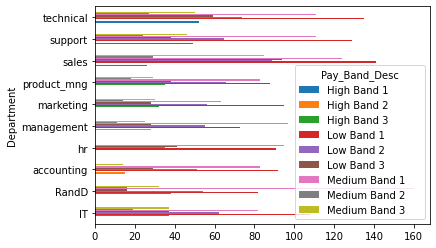

In [4]:
# Since Department,Education ,Years_Of_Experience ,Gender and AgeBand are textual and exluded from the step above, we need a separate groupby to see if these  columns are relevant.

# Let's get a bar chat to display Department. From the Department bar chat, we can conclude that this column is not relevant. We can come to the same conclusion from 
# the groupby query

pd.crosstab(df.Department,df.Pay_Band_Desc).plot(kind='barh')

df1 = df.groupby(["Department"]).agg({'SalaryAmount': ['mean']})
df1.columns = ["Avg Salary"]
df1

In [5]:
# We can easily conclude that the better education you have, the higher your salary ( higher pay band). Education is relevant.
df2 = df.groupby(["Education"]).agg({'SalaryAmount': ['mean']})
df2.columns = ["Avg Salary"]
df2

,Avg Salary
Education,
First Degree,34747.317073
Masters,75149.253731
No Degree,21912.545235
PhD,80000.000000


In [6]:
# We can easily conclude that the more experience you have, the higher your salary ( higher pay band). Education is relevant.
df3 = df.groupby(["Years_Of_Experience"]).agg({'SalaryAmount': ['mean']})
df3.columns = ["Avg Salary"]
df3

,Avg Salary
Years_Of_Experience,
1 Yr,24666.666667
2 Yrs,26738.127544
3 Yrs,30000.000000
4 Yrs,31870.117188
5+ Yrs,54443.750000
None,20000.000000


In [7]:
# Is Gender relevant? The answer is NO. We can ignore this column in our final analysis.
df4 = df.groupby(["Gender"]).agg({'SalaryAmount': ['mean']})
df4.columns = ["Avg Salary"]
df4

,Avg Salary
Gender,
Female,30996.842105
Male,31102.732794


In [8]:
# Lastly, we know that Age is irrelevant. But what about if we use AgeBand? We can come to the same conclusion that AgeBrand is also irrelevan

df4 = df.groupby(["AgeBand"]).agg({'SalaryAmount': ['mean']})
df4.columns = ["Avg Salary"]
df4

,Avg Salary
AgeBand,
Band 1,29926.470588
Band 2,31722.488038
Band 3,27125.000000
Band 4,30398.963731
Band 5,32208.651399
Band 6,30489.383215
Band 7,30851.370851
Band 8,35218.045113


In [9]:
# Step 3: Now that we've completed our analysis, we can come to the conclusion that the relevant independent variable x that affects dependent variable y (Pay_Band_Des)
# are : Satisfaction_Level_At_Interview	,Education and Years_Of_Experience. These are our independent variables x. Since Education and Years_Of_Experience are text,
# we need to get the corresponding dummies for these 2 variables.

# Let's get dummies for Education column 

dummies = pd.get_dummies(df.Education)
dummies.columns = ['First_Degree', 'Masters','No_Degree','PhD']
print(dummies.head())

   First_Degree  Masters  No_Degree  PhD
0             0        0          1    0
1             0        0          1    0
2             0        0          1    0
3             0        0          1    0
4             0        0          1    0


In [10]:
# Let's get dummies for Years_Of_Experience column 

dummies1 = pd.get_dummies(df.Years_Of_Experience)
dummies1.columns = ['1_Yr', '2_Yrs','3_Yrs','4_Yrs','5+_Yrs', 'None']
print(dummies1.head())

   1_Yr  2_Yrs  3_Yrs  4_Yrs  5+_Yrs  None
0     0      0      0      0       0     1
1     0      0      0      0       0     1
2     0      0      0      0       0     1
3     0      0      0      0       0     1
4     0      0      0      0       0     1


In [11]:
# merge the dataset using pandas function namely concat that takes in Lists arguments and specify axis as columns
merged = pd.concat([df,dummies,dummies1], axis = 'columns')
merged.head(5)


,Satisfaction_Level_At_Interview,Department,Pay_Band_Desc,SalaryAmount,Education,Years_Of_Experience,Gender,Age,AgeBand,First_Degree,Masters,No_Degree,PhD,1_Yr,2_Yrs,3_Yrs,4_Yrs,5+_Yrs,None
0,0.0,accounting,Low Band 1,20000,No Degree,None,Female,22,Band 2,0,0,1,0,0,0,0,0,0,1
1,0.0,accounting,Low Band 1,20000,No Degree,None,Female,30,Band 4,0,0,1,0,0,0,0,0,0,1
2,0.0,accounting,Low Band 1,20000,No Degree,None,Female,34,Band 4,0,0,1,0,0,0,0,0,0,1
3,0.0,accounting,Low Band 1,20000,No Degree,None,Female,40,Band 6,0,0,1,0,0,0,0,0,0,1
4,0.0,accounting,Low Band 1,20000,No Degree,None,Female,41,Band 6,0,0,1,0,0,0,0,0,0,1


In [12]:
# Let's drop all the irrelevant columns including one column each ('No_Degree','None') from the dummies columns in order to get independent variables x


# get columns for x
x = merged.drop(['Department', 'Pay_Band_Desc' , 'SalaryAmount' , 'Education' , 'Years_Of_Experience' , 'Gender' ,'Age', 'AgeBand','No_Degree','None'], axis = 'columns')
print(x.head())

   Satisfaction_Level_At_Interview  First_Degree  Masters  PhD  1_Yr  2_Yrs  \
0                              0.0             0        0    0     0      0   
1                              0.0             0        0    0     0      0   
2                              0.0             0        0    0     0      0   
3                              0.0             0        0    0     0      0   
4                              0.0             0        0    0     0      0   

   3_Yrs  4_Yrs  5+_Yrs  
0      0      0       0  
1      0      0       0  
2      0      0       0  
3      0      0       0  
4      0      0       0  


In [13]:
# get dependent variables y
y = df.Pay_Band_Desc
y.head()

0    Low Band 1        
1    Low Band 1        
2    Low Band 1        
3    Low Band 1        
4    Low Band 1        
Name: Pay_Band_Desc, dtype: object

In [14]:
# Step 6: train and fit your model to use available datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) 
x_train.head()




,Satisfaction_Level_At_Interview,First_Degree,Masters,PhD,1_Yr,2_Yrs,3_Yrs,4_Yrs,5+_Yrs
2523,0.75,0,0,0,1,0,0,0,0
3304,0.87,1,0,0,0,0,0,1,0
516,0.19,1,0,0,1,0,0,0,0
702,0.20,0,0,0,0,0,0,0,0
1746,0.59,1,0,0,0,0,0,1,0


In [15]:
reg = LogisticRegression()
reg.fit(x_train,y_train) # fit your logistic regression model. 

C:\Users\tej_j\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [16]:
# let's make some prediction and check accuracy of the model

y_predict = reg.predict(x_test)
print("The predictions are :",y_predict)

The predictions are : ['Low Band 2        ' 'Low Band 1        ' 'Low Band 1        ' ...
 'Low Band 1        ' 'Medium Band 3     ' 'Low Band 2        ']


In [17]:
# Now, let's predict
# A score of 0.9 at interview, PhD and 5 years experience
test_predict = reg.predict([[0.9,0, 0,1,0,0,0,0,1]])
print("A score of 0.9 at interview, PhD and 5 years experience :",test_predict)

# A score of 0.778 at interview, First Degree and 1 year experience
test_predict1 = reg.predict([[0.778,1, 0,0,1,0,0,0,0]])
print("A score of 0.778 at interview, First Degree and 1 year experience :",test_predict1)

# A score of 0.1 at interview, No Degree and 5 No Experience
test_predict2 = reg.predict([[0.1,0, 0,0,0,0,0,0,0]])
print("A score of 0.1 at interview, No Degree and No Experience :",test_predict2)

A score of 0.9 at interview, PhD and 5 years experience : ['High Band 3       ']
A score of 0.778 at interview, First Degree and 1 year experience : ['Low Band 3        ']
A score of 0.1 at interview, No Degree and No Experience : ['Low Band 1        ']


In [18]:
# How accurate is our model?
r2 = reg.score(x_test,y_test)
print("The accuracy of the model is :" ,r2)

The accuracy of the model is : 0.9088564058469476


## Finally, the interesting part. Let's get the sql table and predict new employee pay band based on the various independent variables.

In [19]:
# Let's get the prediction table
query_str1 = "SELECT  [Satisfaction_Level_At_Interview],[Department],[Pay_Band_Desc],[SalaryAmount],[Education] \
      ,[Years_Of_Experience],[Gender],[Age],[AgeBand] FROM [Tutorial].[dbo].[HR_EmployeePayBandPrediction]" 
dfp = pd.read_sql(sql=query_str1, con=conn_str)
dfp.head()

,Satisfaction_Level_At_Interview,Department,Pay_Band_Desc,SalaryAmount,Education,Years_Of_Experience,Gender,Age,AgeBand
0,0.52965,accounting,None,None,No Degree,None,Female,19,Band 1
1,0.52965,accounting,None,None,No Degree,None,Female,20,Band 2
2,0.52965,accounting,None,None,No Degree,None,Female,21,Band 2
3,0.52965,accounting,None,None,No Degree,1 Yr,Female,30,Band 4
4,0.52965,accounting,None,None,No Degree,1 Yr,Female,34,Band 4


In [20]:
# Based on earlier analysis above, we are only interested in Satisfaction_Level_At_Interview,Years_Of_Experience and Education for x

# Let's get dummies for education and as a rule of thump drop one of the column

dummies_p = pd.get_dummies(dfp.Education)
dummies_p.columns = ['First_Degree','Masters','No_Degree','PhD']
dummies_p.head()



,First_Degree,Masters,No_Degree,PhD
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [21]:
# Let's get dummies for Years_Of_Experience

dummies1_p = pd.get_dummies(dfp.Years_Of_Experience)
dummies1_p.columns = ['1_Yr', '2_Yrs','3_Yrs','4_Yrs','5+_Yrs', 'None']
dummies1_p.head()

,1_Yr,2_Yrs,3_Yrs,4_Yrs,5+_Yrs,None
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [22]:
#Let's get all the x columns

x_columns = pd.concat([dfp.Satisfaction_Level_At_Interview,dummies_p,dummies1_p], axis = 'columns')
x_columns.head()

,Satisfaction_Level_At_Interview,First_Degree,Masters,No_Degree,PhD,1_Yr,2_Yrs,3_Yrs,4_Yrs,5+_Yrs,None
0,0.52965,0,0,1,0,0,0,0,0,0,1
1,0.52965,0,0,1,0,0,0,0,0,0,1
2,0.52965,0,0,1,0,0,0,0,0,0,1
3,0.52965,0,0,1,0,1,0,0,0,0,0
4,0.52965,0,0,1,0,1,0,0,0,0,0


## IT IS EXTREMELY IMPORTANT THAT THE ORDER OF YOUR FINAL X IN THIS PREDICTIVE TABLE SHOULD BE EXACTLY AS THE ONE ABOVE I.E THE ONE IN THE ACTUAL TABLE

In [23]:
# Let's drop No_Degree and None

x_final = x_columns.drop(['No_Degree','None'], axis = 'columns')
x_final.head()

,Satisfaction_Level_At_Interview,First_Degree,Masters,PhD,1_Yr,2_Yrs,3_Yrs,4_Yrs,5+_Yrs
0,0.52965,0,0,0,0,0,0,0,0
1,0.52965,0,0,0,0,0,0,0,0
2,0.52965,0,0,0,0,0,0,0,0
3,0.52965,0,0,0,1,0,0,0,0
4,0.52965,0,0,0,1,0,0,0,0


In [24]:
# Let's make some prediction

y_predict1 = reg.predict(x_final)
y_predict1

array(['Low Band 1        ', 'Low Band 1        ', 'Low Band 1        ',
       ..., 'High Band 1       ', 'High Band 1       ',
       'High Band 1       '], dtype=object)

In [25]:
# Let's put our prediction above into a column named Pay_Band_Desc
x_final['Pay_Band_Desc'] = y_predict1
x_final.head()

,Satisfaction_Level_At_Interview,First_Degree,Masters,PhD,1_Yr,2_Yrs,3_Yrs,4_Yrs,5+_Yrs,Pay_Band_Desc
0,0.52965,0,0,0,0,0,0,0,0,Low Band 1
1,0.52965,0,0,0,0,0,0,0,0,Low Band 1
2,0.52965,0,0,0,0,0,0,0,0,Low Band 1
3,0.52965,0,0,0,1,0,0,0,0,Low Band 1
4,0.52965,0,0,0,1,0,0,0,0,Low Band 1


In [26]:
# It is important to get x_final to have exacly the same columns as our final destination table

x_final1 = pd.concat([x_final,dfp.Department,dfp.SalaryAmount,dfp.Education,dfp.Years_Of_Experience,dfp.Gender,dfp.Age,dfp.AgeBand], axis = 'columns')
x_final1.head()

,Satisfaction_Level_At_Interview,First_Degree,Masters,PhD,1_Yr,2_Yrs,3_Yrs,4_Yrs,5+_Yrs,Pay_Band_Desc,Department,SalaryAmount,Education,Years_Of_Experience,Gender,Age,AgeBand
0,0.52965,0,0,0,0,0,0,0,0,Low Band 1,accounting,None,No Degree,None,Female,19,Band 1
1,0.52965,0,0,0,0,0,0,0,0,Low Band 1,accounting,None,No Degree,None,Female,20,Band 2
2,0.52965,0,0,0,0,0,0,0,0,Low Band 1,accounting,None,No Degree,None,Female,21,Band 2
3,0.52965,0,0,0,1,0,0,0,0,Low Band 1,accounting,None,No Degree,1 Yr,Female,30,Band 4
4,0.52965,0,0,0,1,0,0,0,0,Low Band 1,accounting,None,No Degree,1 Yr,Female,34,Band 4


In [27]:
x_final = x_final1.drop(['First_Degree','Masters','PhD', '1_Yr','2_Yrs','3_Yrs','4_Yrs','5+_Yrs'], axis = 'columns')
x_final.head()

,Satisfaction_Level_At_Interview,Pay_Band_Desc,Department,SalaryAmount,Education,Years_Of_Experience,Gender,Age,AgeBand
0,0.52965,Low Band 1,accounting,None,No Degree,None,Female,19,Band 1
1,0.52965,Low Band 1,accounting,None,No Degree,None,Female,20,Band 2
2,0.52965,Low Band 1,accounting,None,No Degree,None,Female,21,Band 2
3,0.52965,Low Band 1,accounting,None,No Degree,1 Yr,Female,30,Band 4
4,0.52965,Low Band 1,accounting,None,No Degree,1 Yr,Female,34,Band 4


In [28]:
# Let's add Status column in order to be able to differentiate between actual and predicted values
x_final['Status'] = 'Predicted'

In [29]:
x_final.head()

,Satisfaction_Level_At_Interview,Pay_Band_Desc,Department,SalaryAmount,Education,Years_Of_Experience,Gender,Age,AgeBand,Status
0,0.52965,Low Band 1,accounting,None,No Degree,None,Female,19,Band 1,Predicted
1,0.52965,Low Band 1,accounting,None,No Degree,None,Female,20,Band 2,Predicted
2,0.52965,Low Band 1,accounting,None,No Degree,None,Female,21,Band 2,Predicted
3,0.52965,Low Band 1,accounting,None,No Degree,1 Yr,Female,30,Band 4,Predicted
4,0.52965,Low Band 1,accounting,None,No Degree,1 Yr,Female,34,Band 4,Predicted


In [30]:
# lastly, insert predicted table into HR_EmployeePayBand table
cursor = conn_str.cursor()
cursor.execute("EXEC [LoadHR_EmployeePayBand]") # truncate table and only load it with actual data.
for i, row in x_final.iterrows():
 cursor.execute("INSERT INTO [Tutorial].[dbo].[HR_EmployeePayBand]([Satisfaction_Level_At_Interview],[Department],[Pay_Band_Desc],[SalaryAmount], \
 [Education],[Years_Of_Experience], [Gender],[Age], [AgeBand],[Status]) values(?,?,?,?,?,?,?,?,?,?)", 
 row['Satisfaction_Level_At_Interview'],row['Department'],row['Pay_Band_Desc'],row['SalaryAmount'], row['Education'],row['Years_Of_Experience'],\
 row['Gender'],row['Age'], row['AgeBand'], row['Status']) 
 #  Let's update the SalaryAmount column from the lookup table
 cursor.execute(" UPDATE t \
  SET t.[SalaryAmount] = t1.[SalaryAmount]\
  FROM [Tutorial].[dbo].[HR_EmployeePayBand] t \
  INNER JOIN [Tutorial].[dbo].[HR_EmployeePayBandLookup] t1 \
  ON t.[Pay_Band_Desc] = t1.[Pay_Band_Desc]")
conn_str.commit()
cursor.close()
conn_str.close()